In this project we will attempt to show the universality of the Logistic maps

We first use RK4 method to integrate the system we want

In [1]:
using Plots
using PlotThemes

## Rossler system

### dx/dt = blah blah blah


In [2]:
function deriv(y,t,args)
    c = args
    p = y[1]
    q = y[2]
    z = y[3]
    a = 0.2
    b = 0.2
    #c = 4.5 #the parameter
    return [-q-z , p + a*q , b + z*(p-c) ]
end

deriv (generic function with 1 method)

In [156]:
#initial conditions
y0 = [1,1,2]
st_time = 0
end_time = 500
h = 10^-3 #step size
r = (end_time - st_time)/h
t = LinRange(st_time, end_time, trunc(Int,r)+1)

500000-element LinRange{Float64}:
 0.0,0.001,0.002,0.00300001,0.00400001,…,499.996,499.997,499.998,499.999,500.0

In [132]:
function rk4(f,y0,t,args)
    N = size(t)[1]
    y = zeros(N,3)
    y[1,:] = y0
    for i=1:N-1
        h = t[i+1] - t[i]
        k1 = f(y[i,:],t[i],args)
        k2 = f(y[i,:] + k1*h/2, t[i] + h/2,args)
        k3 = f(y[i,:] + k2*h/2, t[i] + h/2,args)
        k4 = f(y[i,:] + k3*h, t[i] + h,args)
        y[i+1,:] = y[i,:] + h*(k1+2*k2+2*k3+k4)/6
    end
    return y
end

rk4 (generic function with 1 method)

In [56]:
sol = rk4(deriv,y0,t,2)

200000×3 Array{Float64,2}:
  1.0       1.0      2.0
  0.970031  1.01186  1.98179
  0.940129  1.02345  1.96318
  0.9103    1.03476  1.94418
  0.880552  1.04579  1.92482
  0.85089   1.05655  1.90509
  0.821321  1.06704  1.88504
  0.79185   1.07725  1.86466
  0.762484  1.08718  1.84399
  0.733228  1.09685  1.82303
  0.704088  1.10624  1.80181
  0.675069  1.11535  1.78034
  0.646176  1.1242   1.75864
  ⋮                  
 -1.50903   2.35119  0.570365
 -1.53811   2.34065  0.552583
 -1.5669    2.3298   0.535261
 -1.59541   2.31863  0.518396
 -1.62364   2.30716  0.501982
 -1.65159   2.29539  0.486014
 -1.67927   2.28331  0.470486
 -1.70667   2.27094  0.455391
 -1.73379   2.25826  0.440724
 -1.76065   2.24529  0.426477
 -1.78723   2.23203  0.412645
 -1.81354   2.21848  0.399219

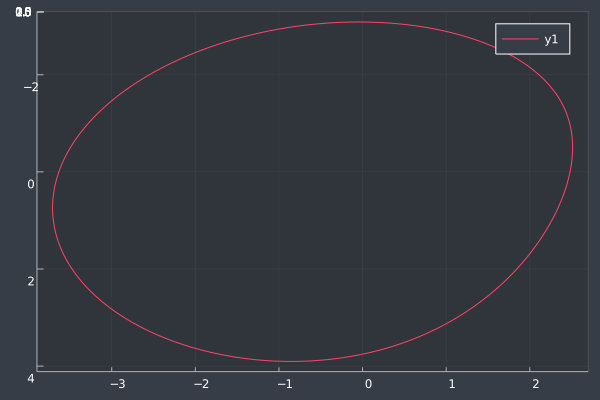

In [63]:
#size_dat1 = trunc(Int,size(sol[:,[1]])[1]/2)
size_dat1 = size(sol[:,[1]])[1] - 40000
size_dat2 = size(sol[:,[1]])[1]

x_dat = sol[size_dat1:size_dat2,[1]]
y_dat = sol[size_dat1:size_dat2,[2]]
z_dat = sol[size_dat1:size_dat2,[3]]

Plots.theme(:dark)

plot(x_dat,y_dat,z_dat,camera=(90,90))



In [32]:
size(x_dat)

(40001, 1)

In [133]:
function peak(y)
    m0 = 0
    peaks_arr1 = Float64[]
    peaks_arr2 = Float64[]
    for i=2:size(y)[1]-1
        if y[i] > y[i-1] && y[i] > y[i+1]
            push!(peaks_arr1, y[i])
            push!(peaks_arr2, m0)#y[i])
            m0 = y[i]
        end
    end
    return peaks_arr2,peaks_arr1 
end

peak (generic function with 1 method)

In [36]:
y = peak(sol[:,[1]])
size(y[2])

(342,)

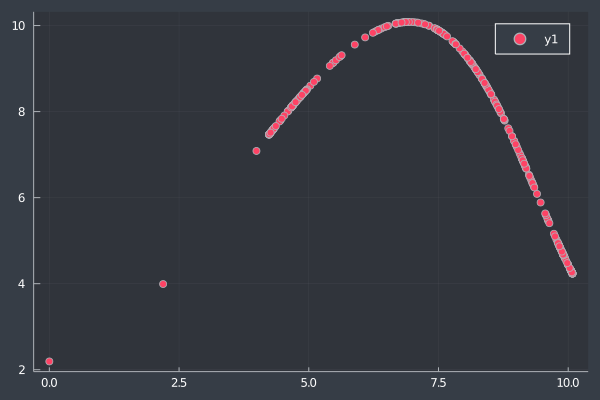

In [38]:
scatter(y[1],y[2][1:342])

In [136]:
t = sol[:,[1]]
print(t[size(t,1)-40:size(t,1)])

[-2.0574846379116454, -2.0884291411862757, -2.1190972049080807, -2.1494900690166894, -2.179608864507421, -2.209454614269288, -2.2390282341232153, -2.268330534047661, -2.297362219572258, -2.326123893332362, -2.354616056766127, -2.382839111943317, -2.4107933635132235, -2.438479020759605, -2.465896199753282, -2.493044925587248, -2.519925134688234, -2.5465366771967273, -2.572879319397396, -2.5989527462016353, -2.624756563667267, -2.65029030155154, -2.675553415885722, -2.7005452915683112, -2.7252652449720447, -2.7497125265504945, -2.7738863234483735, -2.7977857621041093, -2.82140991084378, -2.844757782456021, -2.8678283367530253, -2.890620483106009, -2.9131330829534767, -2.9353649522825354, -2.957314864076777, -2.9789815507297828, -3.0003637064217203, -3.021459989456791, -3.0422690245611896, -3.06278940513645, -3.0830196954716382]

For each value of c in (2,5) we allow the system to evolve and we find that the x_f after certain iterations gives us the orbit diagram. We are plotting previous 1000 values of the x_f after reaching equilibrium 

In [163]:
#orbit diagram

c_arr = LinRange(2,5,200)

Y = Vector{Float64}[]

i_arr = 0
for ci in c_arr
    temp_1 = rk4(deriv,y0,t,ci)[:,[1]]
    temp_2 = peak(temp_1)[2]
    push!(Y, temp_2)
    println(i_arr)
    i_arr+=1
end

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [120]:
for i=1:size(Y)[1]
   println(size(Y[i],1)) 
end

175
175
175
174
174
174
174
174
174
174
174
174
174
174
174
174
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
173
172
172
172
172
172
172
172
172
172
172
172
172
172
172
172
172
172
172
172
172
172
171
171
171
171
171
171
171
171
171
171
171
171
171
171
171
171
171
171
171
171
171
171
171


In [162]:
p = plot(0,0)

#size_plot = min([])


for i=1:84#size(Y[1])[1]
    m = zeros(size(Y)[1])
    for j=1:size(Y)[1]
        m[j] = Y[j][i]
    end
    scatter!(c_arr,m,markersize=0.1,color="white",alpha = 0.2,size = (1000, 500),legend = false)
end
savefig("plot_rossler_orbit.png") 


In [114]:
p = plot(0,0)

for i=1:100#size(Y[1])[1]
    m = zeros(size(Y)[1])
    for j=1:size(Y)[1]
        m[j] = Y[i][j]
    end
    scatter!(c_arr,m,markersize=0.3,color="white",alpha = 0.8,size = (2000, 1000),legend = false)
end
savefig("plot_orbitmap_rossler.png") 

In [107]:
p = plot(0,0)

for i=1:size(Y[1])[1]
    m = zeros(size(Y)[1])
    for j=1:size(Y)[1]
        m[j] = Y[i][j]
    end
    scatter!(c_arr,m,markersize=0.3,color="white",alpha = 0.8,size = (2000, 1000),legend = false)
end
savefig("plot_orbitmap_rossler.png") 

BoundsError: [91mBoundsError: attempt to access 100-element Array{Array{Float64,1},1} at index [101][39m

In [104]:
p = plot(0,0)

for i = 1:size(Y[1])[1]
    #for j = 1:size(Y)[1]
    #    m = 
    #end
    scatter!(c_arr,Y[:,i],markersize=0.3,color="white",alpha = 0.8,size = (2000, 1000),legend = false)
end

BoundsError: [91mBoundsError: attempt to access 1000-element Array{Array{Float64,1},1} at index [Base.Slice(Base.OneTo(1000)), 2][39m

Period 5 and prime periods

Can we find analytically ?

Cant solve polynomial for 5 or more order

Numerical period finding, find value of r and for what values they are superstable

Feigenbaum constant retrieve from this experiment

